In [1]:
#%pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt


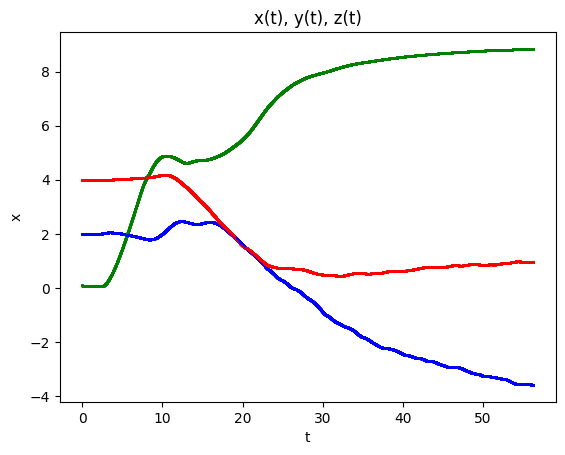

In [11]:
path = "../../logs/log_1/robot_3.txt"

with open(path, "r") as file:
     plt.title("x(t), y(t), z(t)")
     plt.xlabel('t')
     plt.ylabel('x')
     t = 0

     for line in file:
        nums = [float(item) for item in line.rstrip().split(' ')]
        x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt = nums
        plt.scatter(t, x, s=1, color='blue')
        plt.scatter(t, y, s=1, color='red')
        plt.scatter(t, z, s=1, color='green')
        t += 0.008

plt.show()

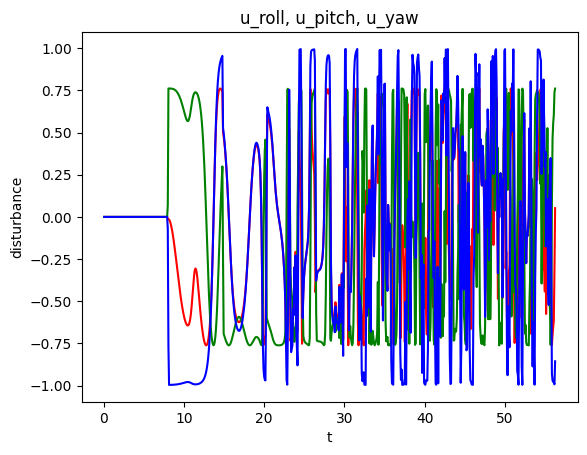

In [20]:
with open(path, "r") as file:
     plt.title("u_roll, u_pitch, u_yaw")
     plt.xlabel('t')
     plt.ylabel('disturbance')
     i = 0
     
     ts = []
     u_rolls = []
     u_pitches = []
     u_yaws = []

     for line in file:
        nums = [float(item) for item in line.rstrip().split(' ')]
        x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt = nums

        if i > 0 and i % 10 == 0:
            t = 0.008 * i
            t_prev = 0.008 * (i - 1)

            ts.append(t)
            u_rolls.append(u_roll)
            u_pitches.append(u_pitch)
            u_yaws.append(u_yaw)

        i += 1

plt.plot(ts, u_rolls, color='red')
plt.plot(ts, u_pitches, color='green')
plt.plot(ts, u_yaws, color='blue')
plt.show()

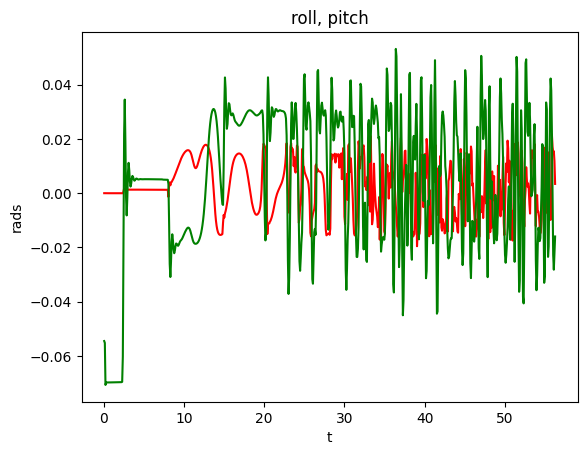

In [ ]:
with open(path, "r") as file:
     plt.title("roll, pitch")
     plt.xlabel('t')
     plt.ylabel('rads')
     i = 0
     
     ts = []
     rolls = []
     pitches = []
     yaws = []

     for line in file:
        nums = [float(item) for item in line.rstrip().split(' ')]
        x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt = nums

        if i > 0 and i % 10 == 0:
            t = 0.008 * i
            t_prev = 0.008 * (i - 1)

            ts.append(t)
            rolls.append(roll)
            pitches.append(pitch)
            yaws.append(yaw)

        i += 1

plt.plot(ts, rolls, color='red')
plt.plot(ts, pitches, color='green')
#plt.plot(ts, yaws, color='blue')
plt.show()

Visualizing data for supervisor`s purposes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

dir = "../../logs/log_2/"
log_files = os.listdir(dir)
log_data = []
ts = []

write_ts = True

for file_path in log_files:
    with open(dir + file_path, "r") as file:
        i = 0
        robot_logs = []

        for line in file:
            nums = [float(item) for item in line.rstrip().split(' ')]
            x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_x_plus, d_x_minus = nums

            if i > 0 and i % 10 == 0:
                t = 0.008 * i
                t_prev = 0.008 * (i - 1)

                if write_ts:
                    ts.append(t)

                robot_logs.append(nums)

            i += 1
        
    write_ts = False
    log_data.append(robot_logs)



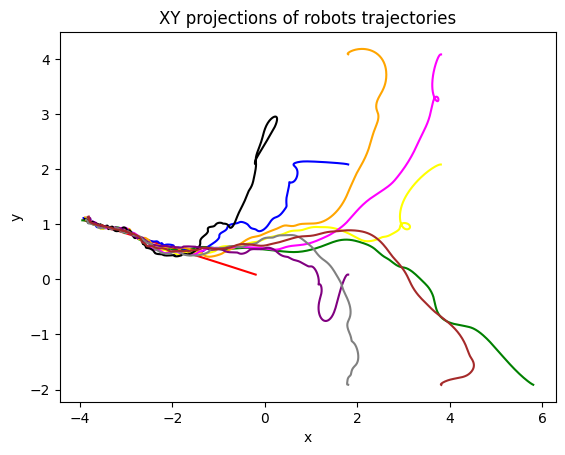

In [8]:
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'magenta', 'black', 'purple', 'grey', 'brown']

for robot_data, color in zip(log_data, colors):
    xs, ys = [], []

    for data_line in robot_data:
        x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_x_plus, d_x_minus = data_line
        xs.append(x)
        ys.append(y)
        
    plt.plot(xs, ys, color=color)

plt.xlabel('x')
plt.ylabel('y')
plt.title('XY projections of robots trajectories')
plt.show()

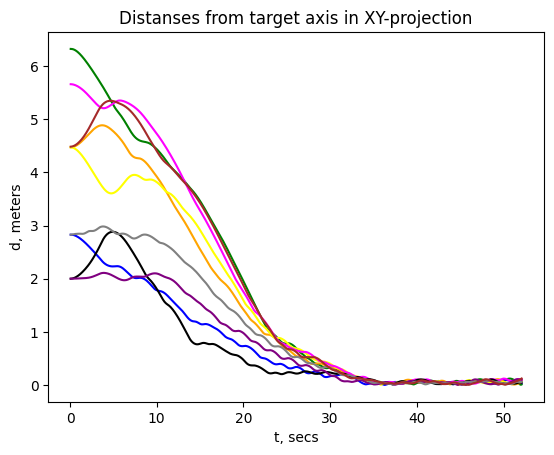

In [ ]:
for robot_data, color in zip(log_data[1:], colors[1:]):
    ds = []

    for data_line, t, anchor_line in zip(robot_data[:651], ts[:651], log_data[0][:651]):
        x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_x_plus, d_x_minus = data_line
        x1, y1, z1, roll1, pitch1, yaw1, u_roll1, u_pitch1, u_yaw1, target_alt1, d_x_plus1, d_x_minus1 = anchor_line
        v = np.array([x - x1, y - y1])
        d = np.linalg.norm(v)
        ds.append(d)

    plt.plot(ts[:651], ds, color=color)

plt.title('Distanses from target axis in XY-projection')
plt.xlabel('t, secs')
plt.ylabel('d, meters')
plt.show()


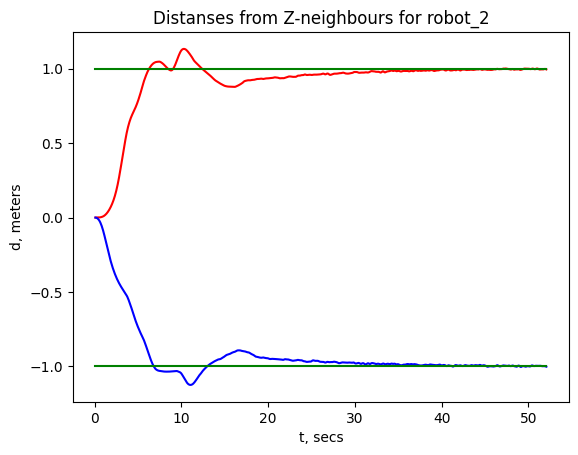

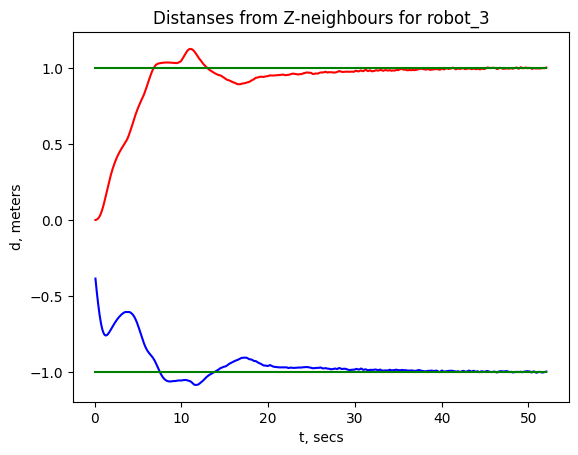

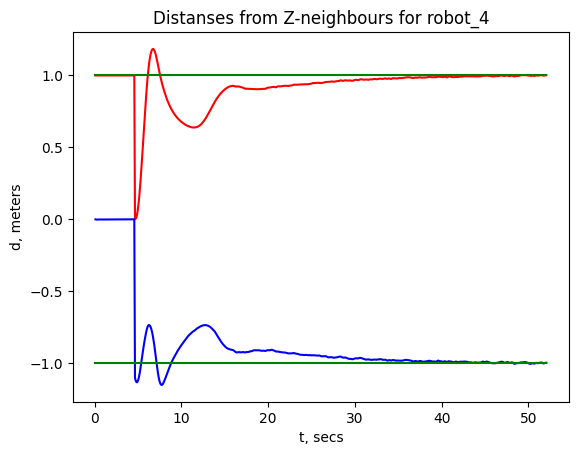

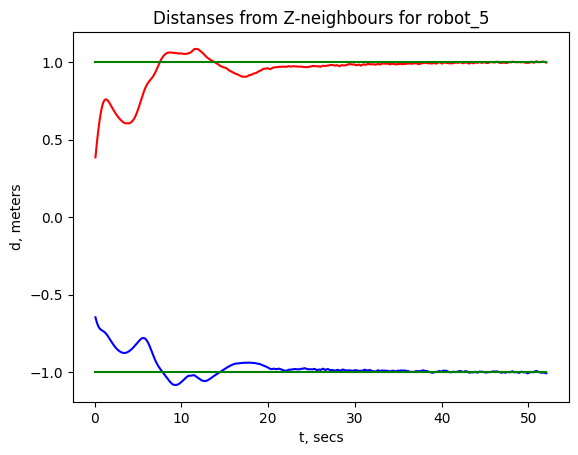

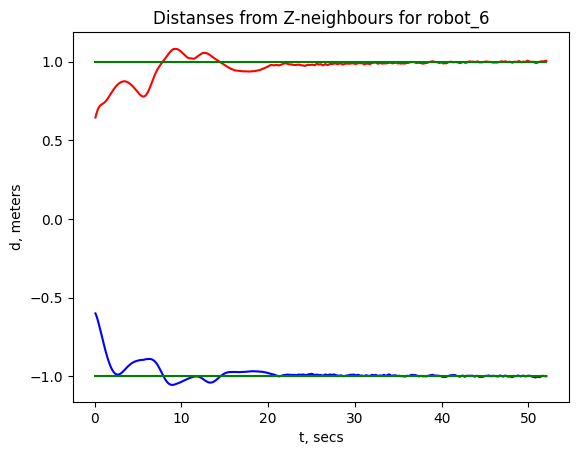

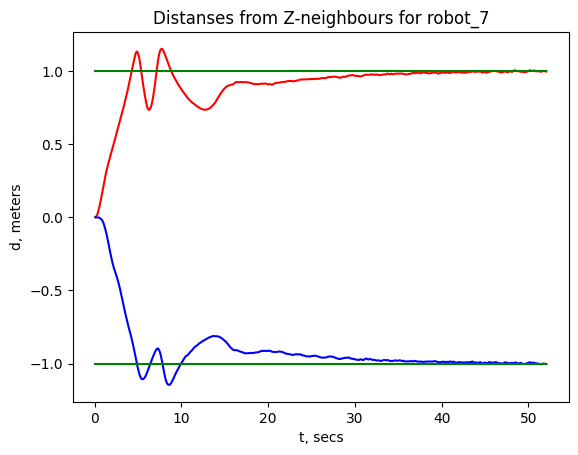

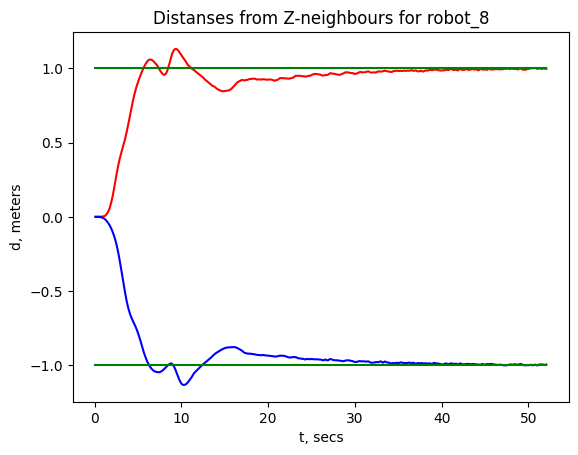

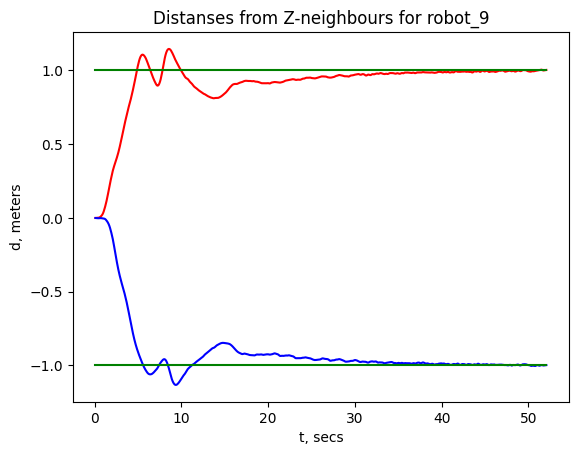

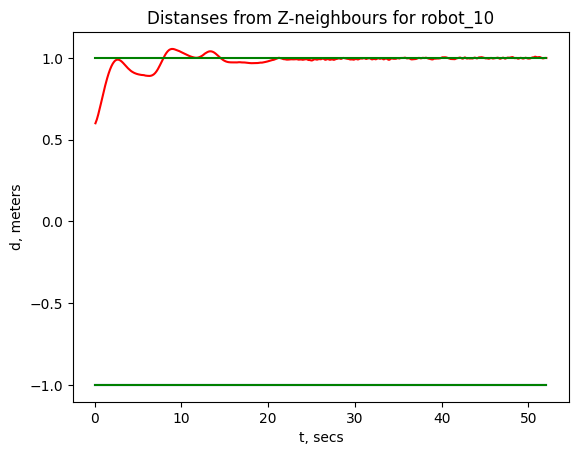

In [29]:
plus_ones = [1 for i in ts[:651]]
minus_ones = [-1 for i in ts[:651]]

for robot_data, i in zip(log_data[1:], range(1, 10)):
    ds_plus, ds_minus = [], []

    for data_line, t in zip(robot_data[:651], ts[:651]):
        x, y, z, roll, pitch, yaw, u_roll, u_pitch, u_yaw, target_alt, d_z_plus, d_z_minus = data_line
        ds_plus.append(d_z_plus)
        ds_minus.append(-d_z_minus)

    plt.plot(ts[:651], ds_plus, color='red')
    plt.plot(ts[:651], ds_minus, color='blue')
    plt.plot(ts[:651], plus_ones, color='green')
    plt.plot(ts[:651], minus_ones, color='green')

    plt.title('Distanses from Z-neighbours for robot_' + str(i + 1))
    plt.xlabel('t, secs')
    plt.ylabel('d, meters')
    plt.show()